# Logistic Regression 

Here we use gradient ascent to find the weights for the logistic regression problem.   

We will use the breast cancer data set.  This data set is described here:

https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin

Goal is to detect if the cells are benign or malignant.

## Step 1:  Getting, preprocessing, and understanding the dataset

### Importing the standard libraries

In [1]:
# Importing important libraries
from sklearn.datasets import load_breast_cancer 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline

### Importing the dataset

In [2]:
# Loading the dataset
cancer = load_breast_cancer()
y = cancer.target
X = cancer.data

In [3]:
# Printing the shape of data (X) and target (Y) values 
print(X.shape)
print(y.shape)

(569, 30)
(569,)


### Data Pre-Processing
#### Splitting the data into train and test


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### Scaling the data since we will be using gradient ascent

In [5]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
print(X_train.shape) 
print(y_train.shape) 

(426, 30)
(426,)


In [7]:
# Appending a column of ones to x_train 
ones = np.ones(X_train.shape[0]).reshape((X_train.shape[0], 1))
X_train = np.hstack((ones, X_train))

ones = np.ones(X_test.shape[0]).reshape((X_test.shape[0], 1))
X_test = np.hstack((ones, X_test))


print("The trainng data has dimensions: ", X_train.shape, ". The testing data has dimensions: ",X_test.shape)
print(X_train[0:2])

The trainng data has dimensions:  (426, 31) . The testing data has dimensions:  (143, 31)
[[ 1.         -0.90521714 -0.48626207 -0.8394074  -0.80557355 -0.50755718
   0.1454228   0.06947634 -0.3316809  -1.15262223  0.53235287 -0.53353928
   0.29973957 -0.04171621 -0.47872297  0.56268224  1.23419747  1.27327171
   1.06146621 -0.63852784  0.51085423 -0.82316123  0.20978099 -0.52104187
  -0.7200228   0.30403659  1.01126215  0.99687826  0.62213189 -0.56249928
   0.63731296]
 [ 1.          1.36443141  1.67427407  1.47763826  1.29027841  1.73014412
   1.40702225  1.28537276  2.39787855 -0.62358371  1.36133627  0.3718613
   3.07008442  1.39283566  0.52461757  0.20252768  2.04008512 -0.35752741
   1.19120405  1.23146207  2.71622789  0.81954799  1.1729439   0.99179884
   0.70812111  0.30843319  0.2006107  -0.1238942   1.0526689  -0.92732426
   0.45719967]]


### Understanding the dataset

In [8]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']



# Step 2: Fitting the model
## Implementing Logistic Regression Using Gradient Ascent


 
### Sigmoid($z$)
The first function we write here is sigmoid($z$)

sigmoid($z$) takes as input a column vector of real numbers, $z^T = [z_1, z_2, ..., z_{N'}]$, where $N'$ is the number of  examples

It should produce as output a column vector $\left[\frac{1}{1+e^{-z_1}},\frac{1}{1+e^{-z_2}},...,\frac{1}{1+e^{-z_{N'}}}\right]^T$

In [9]:
def sigmoid(z):
    sig = 1. / (1. + np.exp(-z))
    return sig
    

In [10]:
print(sigmoid(0))

0.5


### Initializing ${\bf w}$
For testing the next functions, we create a coefficient vector, ${\bf w}$.
We will initialize the coeffients to be $0$, i.e. ${\bf w}^T = [0,0,\ldots ,0]$ (We could have initialized ${\bf w}$ to any values.)

In [11]:
w = np.zeros((X_train.shape[1], 1))
print(w.shape)

(31, 1)


### Our hypothesis, $h({\bf x})$
The next  function to write is our hypothesis function. 

For example if our design matrix $X$ consists of single example $X=[1,x_1,x_2,\ldots,x_d]$ and  weights ${\bf w}^T=[w_0,w_2,\ldots, w_d]$, it returns $h({\bf x})=\frac{1}{1+e^{-\left({w_{0}\cdot 1 +w_1\cdot x_1+\cdots w_d\cdot x_d}\right)}}$

If given a  matrix consisting of $N'$ examples 
$X=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$
and  weights ${\bf w}^T=[w_0,w_2,\ldots, w_d]$, the function returns a column vector
$[h({\bf x}^{(1)}),h({\bf x}^{(2)},\ldots, h({\bf x}^{(N')}]^T$

In [12]:
def get_prediction(X, w):
    yp = np.dot(X, w);
    return yp;

In [13]:
def hypothesis(X , w):
    yp = get_prediction(X, w)
    hx = sigmoid(yp)    
    return hx

In [14]:
yhat = hypothesis(X_train, w)

print(yhat.shape) 
print(y_train.shape) 

(426, 1)
(426,)


### Log-Likelihood Function.
log likelihood function $\ell({\bf w})=
\sum_{i=1}^{N'}y^{(i)}\ln(h({\bf x}^{(i)})) +(1- y^{(i)})\ln(1-h({\bf x}^{(i)}))$

The input is a matrix consisting of $N'$ examples $X=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$
and a column vector ${\bf y}^T=[y^{(1)},y^{(2)},\dots,y^{(N')}]$ of labels for $X$.

The output is $\ell({\bf w})$

In [16]:
def log_likelihood(X , y , w ):
    hx = hypothesis(X, w)
    y = y.reshape(y.shape[0],1)
    return np.sum(y * np.log(hx) + ((1-y) * np.log(1-hx)))

In [17]:
log_likelihood(X_train,y_train,w)

-295.2806989185367

# Gradient Ascent


In [18]:
def Logistic_Regresion_Gradient_Ascent(X, y, learning_rate, num_iters):
    # Initializing log_likelihood to be an empty list  
    log_likelihood_values = []
    
    w = np.zeros((X.shape[1], 1))
    # Initialize N to the number of training examples
    N = X.shape[0] 
    
    y = y.reshape(y.shape[0],1)
    num_coeff = len(w)
    for j in range(1,num_iters+1):
        for i in range(num_coeff):
            hx = hypothesis(X, w)
            diff = y-hx
            x_curr = X[:,i]
            x_curr = x_curr.reshape(x_curr.shape[0],1)
            w[i][0] = w[i][0] + learning_rate/N * np.sum(diff * x_curr)
        if (j % 100) == 0:
            log_likelihood_values.append(log_likelihood(X,y,w))
    return w, log_likelihood_values

In [20]:
learning_rate = 0.5
num_iters = 5000 # The number of iteratins to run the gradient ascent algorithm

w, log_likelihood_values = Logistic_Regresion_Gradient_Ascent(X_train, y_train, learning_rate, num_iters)
print(w)
print(log_likelihood_values)

[[-0.93531846]
 [ 0.35616461]
 [-1.04442663]
 [ 0.3815917 ]
 [ 0.16721161]
 [-0.29625461]
 [ 2.77557699]
 [-2.13226081]
 [-2.16986363]
 [ 0.04850516]
 [ 0.49482736]
 [-3.53975374]
 [ 0.92205855]
 [-2.16574528]
 [-2.52420249]
 [ 0.65586384]
 [ 0.22023554]
 [ 1.19403452]
 [-0.55792483]
 [-0.3951598 ]
 [ 1.84940865]
 [-1.62372509]
 [-2.02402693]
 [-1.04441369]
 [-1.81253054]
 [-1.63930548]
 [ 0.6595154 ]
 [-2.63532284]
 [-1.37774365]
 [-1.35231401]
 [-0.57738127]]
[-28.21616805871362, -24.565250399635335, -22.878839926603057, -21.86335863210162, -21.16133395507209, -20.62766396958536, -20.194798244108043, -19.82793981828478, -19.50745255291353, -19.221392573680024, -18.962038443986415, -18.72413794645314, -18.50395960498205, -18.298750690019045, -18.106413229763028, -17.92530276407006, -17.754099048488186, -17.591720407554927, -17.437265375138438, -17.28997185880066, -17.149187840695078, -17.014349852425447, -16.884966806591297, -16.760607599836494, -16.640891427440906, -16.52548008722311

# Plotting Likelihood v/s Number of Iterations.

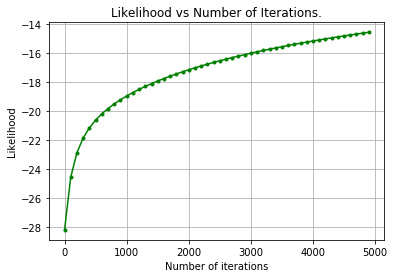

In [21]:
iters = np.array(range(0,num_iters,100))
plt.plot(iters,log_likelihood_values,'.-',color='green')
plt.xlabel('Number of iterations')
plt.ylabel('Likelihood')
plt.title("Likelihood vs Number of Iterations.")
plt.grid()

# Step 3: Evaluating our model

In [22]:
threshold = 0.5
test_prediction = hypothesis(X_test, w)
test_prediction[test_prediction > threshold] = 1
test_prediction[test_prediction < threshold] = 0
y_test = y_test.reshape(y_test.shape[0],1)

TP = np.sum(np.logical_and(test_prediction == 1, y_test == 1))
TN = np.sum(np.logical_and(test_prediction == 0, y_test == 0))
FP = np.sum(np.logical_and(test_prediction == 1, y_test == 0))
FN = np.sum(np.logical_and(test_prediction == 0, y_test == 1))
print('TP: %i, FP: %i, TN: %i, FN: %i' % (TP,FP,TN,FN))
precision = TP/(TP+FP)
print("precision: ", precision)
recall = TP/(TP+FN)
print("recall: ", recall)
f1 = (2*precision*recall)/(precision+recall)
print("F1: ", f1)

TP: 88, FP: 5, TN: 49, FN: 1
precision:  0.946236559139785
recall:  0.9887640449438202
F1:  0.967032967032967


### Using Test set as a validation set

In [23]:
def accuracy(prediction, actual, threshold):
    actual = actual.reshape(actual.shape[0],1)
    prediction[prediction > threshold] = 1
    prediction[prediction < threshold] = 0
    return np.sum(prediction == actual)/len(prediction)

In [24]:
accuracy(test_prediction, y_test, threshold)

0.958041958041958

In [25]:
def Logistic_Regresion_Gradient_Ascent_With_Validation(X, y, Xt, yt, learning_rate, num_iters, pred_threshold):
    
    w = np.zeros((X.shape[1], 1))
    N = X.shape[0] 
    y = y.reshape(y.shape[0],1)
    num_coeff = len(w)
    p_acc = 0
    p_w = w
    for j in range(1,num_iters+1):
        acc = accuracy(hypothesis(Xt, w), yt, pred_threshold)
        print("accuracy: ", acc)
        if acc < p_acc:
            print("acc stars decreasing at iteration: ", j)
            break;
        else:
            p_acc = acc
            p_w = w
            for i in range(num_coeff):
                hx = hypothesis(X, w)
                diff = y-hx
                x_curr = X[:,i]
                x_curr = x_curr.reshape(x_curr.shape[0],1)
                w[i][0] = w[i][0] + learning_rate/N * np.sum(diff * x_curr)
    return p_w

In [26]:
alpha = 0.5
new_i = 10000
wt = Logistic_Regresion_Gradient_Ascent_With_Validation(X_train,\
                                                         y_train,\
                                                         X_test,\
                                                         y_test,\
                                                         alpha,\
                                                         new_i,\
                                                         threshold)

accuracy:  0.0
accuracy:  0.9230769230769231
accuracy:  0.9230769230769231
accuracy:  0.9440559440559441
accuracy:  0.951048951048951
accuracy:  0.951048951048951
accuracy:  0.958041958041958
accuracy:  0.958041958041958
accuracy:  0.958041958041958
accuracy:  0.958041958041958
accuracy:  0.958041958041958
accuracy:  0.958041958041958
accuracy:  0.958041958041958
accuracy:  0.958041958041958
accuracy:  0.958041958041958
accuracy:  0.958041958041958
accuracy:  0.958041958041958
accuracy:  0.965034965034965
accuracy:  0.965034965034965
accuracy:  0.965034965034965
accuracy:  0.965034965034965
accuracy:  0.965034965034965
accuracy:  0.972027972027972
accuracy:  0.972027972027972
accuracy:  0.972027972027972
accuracy:  0.972027972027972
accuracy:  0.972027972027972
accuracy:  0.972027972027972
accuracy:  0.972027972027972
accuracy:  0.972027972027972
accuracy:  0.972027972027972
accuracy:  0.972027972027972
accuracy:  0.972027972027972
accuracy:  0.972027972027972
accuracy:  0.972027972027

In [27]:
acc = accuracy(hypothesis(X_train, wt), y_train, threshold)
print("accuracy with cross validation: ", acc)

accuracy with cross validation:  0.9859154929577465
